In [ ]:
import bs4
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np

In [ ]:
link1='https://www.flipkart.com/search?q=tv&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_8_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_8_0_na_na_na&as-pos=8&as-type=TRENDING&suggestionId=tv&requestId=9c9fa553-b7e5-454b-a65b-bbb7a9c74a29'

In [ ]:
link = 'https://www.flipkart.com/search?q=television&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&sort=popularity&page=1'

In [ ]:
page = requests.get(link)
soup = bs(page.content, 'html.parser')
#it gives us the visual representation of data
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://rukminim1.flixcart.com" rel="preconnect"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.914d0a.css" rel="stylesheet"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <meta content="noodp" name="robots"/>
  <link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
  <meta content="website" property="og:type"/>
  <meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
  <link href="/apple-touch-icon-57x

In [ ]:
name=soup.find('div',class_="_4rR01T")
print(name)

<div class="_4rR01T">LG 80 cm (32 inch) HD Ready LED Smart WebOS TV</div>


In [ ]:
name.text

'LG 80 cm (32 inch) HD Ready LED Smart WebOS TV'

In [ ]:
#get rating of a product
rating=soup.find('div',class_="_3LWZlK")
print(rating)


<div class="_3LWZlK">4.4</div>


In [ ]:
rating.text

'4.4'

In [ ]:
#get other details and specifications of the product
specification=soup.find('div',class_="fMghEO")
print(specification)
specification.text

<div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">Operating System: WebOS</li><li class="rgWa7D">HD Ready 1366 x 768 Pixels</li><li class="rgWa7D">1 Year LG India Comprehensive Warranty and additional 1 year Warranty is applicable on Panel/Module from the date of purchase.</li></ul></div>


'Operating System: WebOSHD Ready 1366 x 768 Pixels1 Year LG India Comprehensive Warranty and additional 1 year Warranty is applicable on Panel/Module from the date of purchase.'

In [ ]:
for each in specification:
    spec=each.find_all('li',class_='rgWa7D')
    print(spec[0].text)
    print(spec[1].text)
    print(spec[2].text)

Operating System: WebOS
HD Ready 1366 x 768 Pixels
1 Year LG India Comprehensive Warranty and additional 1 year Warranty is applicable on Panel/Module from the date of purchase.


In [ ]:
"Pixels" in spec[1].text

True

In [ ]:
#get price of the product
price=soup.find('div',class_='_30jeq3 _1_WHN1')
print(price)
price.text

<div class="_30jeq3 _1_WHN1">₹13,999</div>


'₹13,999'

In [ ]:
products=[]              #List to store the name of the product
prices=[]                #List to store price of the product
ratings=[]               #List to store rating of the product
os = []                  #List to store operating system
hd = []                  #List to store resolution
wrty = []               #List to store warranty

In [ ]:
for data in soup.findAll('div',class_='_3pLy-c row'):
        names=data.find('div', attrs={'class':'_4rR01T'})
        price=data.find('div', attrs={'class':'_30jeq3 _1_WHN1'})
        rating=data.find('div', attrs={'class':'_3LWZlK'})
        specification = data.find('div', attrs={'class':'fMghEO'})

        for each in specification:
            col=each.find_all('li', attrs={'class':'rgWa7D'})
            os_ =col[0].text
            if("Pixels" in col[1].text):
              hd_ = col[1].text
              wt_ = col[2].text
            else:
              hd_ = "None"
              wt_ = col[1].text
        products.append(names.text) # Add product name to list
        prices.append(price.text) # Add price to list
        os.append(os_) # Add operating system specifications to list
        hd.append(hd_) # Add resolution specifications to list
        wrty.append(wt_) # Add warranty specifications to list
        ratings.append(rating.text)   #Add rating specifications to list

In [ ]:
len(hd)

24

In [ ]:
products=[]              #List to store the name of the product
prices=[]                #List to store price of the product
ratings=[]               #List to store rating of the product
os = []                  #List to store operating system
hd = []                  #List to store resolution
wrty = []               #List to store warranty


for i in range(1,69):
  link = 'https://www.flipkart.com/search?q=television&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&sort=popularity&page='+str(i)

  page = requests.get(link)
  soup = bs(page.content, 'html.parser')

  for data in soup.findAll('div',class_='_3pLy-c row'):
        names=data.find('div', attrs={'class':'_4rR01T'})
        price=data.find('div', attrs={'class':'_30jeq3 _1_WHN1'})
        rating=data.find('div', attrs={'class':'_3LWZlK'})
        specification = data.find('div', attrs={'class':'fMghEO'})

        if specification is None:
          continue
        else:
          for each in specification:
              col=each.find_all('li', attrs={'class':'rgWa7D'})
              os_ =col[0].text
              if("Pixels" in col[1].text):
                hd_ = col[1].text
                wt_ = col[2].text
              else:
                hd_ = "None"
                wt_ = col[1].text
          products.append(names.text) # Add product name to list
          prices.append(price.text) # Add price to list
          os.append(os_) # Add operating system specifications to list
          hd.append(hd_) # Add resolution specifications to list
          wrty.append(wt_) # Add warranty specifications to list
          if rating is None:
            ratings.append('-1')
          else:
            ratings.append(rating.text)
                #Add rating specifications to list


In [ ]:
len(prices)

946

In [ ]:
df=pd.DataFrame({'Product Name':products,'OS':os,"Warranty":wrty,"Resolution":hd,'Price':prices,'Rating':ratings})
df.head(10)

,Product Name,OS,Warranty,Resolution,Price,Rating
0,SAMSUNG 80 cm (32 Inch) HD Ready LED Smart Tiz...,Operating System: Tizen,1 Year Comprehensive Warranty on Product and 1...,HD Ready 1366 x 768 Pixels,"₹11,999",4.4
1,Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...,Operating System: Android,1 Year Warranty on Product and 2 Years Warrant...,HD Ready 1366 x 768 Pixels,"₹11,999",4.4
2,realme 80 cm (32 inch) HD Ready LED Smart Andr...,Operating System: Android,"1 Year Domestic Warranty, 2 Years on Panel",HD Ready 1366 x 768 Pixels,"₹10,999",4.3
3,LG 80 cm (32 inch) HD Ready LED Smart WebOS TV,Operating System: WebOS,1 Year LG India Comprehensive Warranty and add...,HD Ready 1366 x 768 Pixels,"₹13,990",4.4
4,Infinix Y1 80 cm (32 inch) HD Ready LED Smart ...,Operating System: Linux,1 Year Domestic Warranty,HD Ready 1366 x 768 Pixels,"₹8,199",4.2
5,OnePlus Y1S 80 cm (32 inch) HD Ready LED Smart...,Operating System: Android,1 Year Comprehensive Warranty and Additional 1...,HD Ready 1366 x 768 Pixels,"₹15,199",4.3
6,Acer I Series 80 cm (32 inch) HD Ready LED Sma...,Operating System: Android,1 Year Warranty,HD Ready 1366 x 768 Pixels,"₹10,999",4.4
7,Mi X Series 108 cm (43 inch) Ultra HD (4K) LED...,Operating System: Android,1 Year Warranty on Product and 2 Years Warrant...,Ultra HD (4K) 3840 x 2160 Pixels,"₹26,999",4.3
8,iFFALCON by TCL 80.04 cm (32 inch) HD Ready LE...,Operating System: Android,1 Year Warranty on Product,HD Ready 1366 x 768 Pixels,"₹9,499",4.2
9,Thomson Alpha 80 cm (32 inch) HD Ready LED Sma...,Operating System: Linux,1 Year Warranty on Product and 6 Months on Acc...,HD Ready 1366 x 768 Pixels,"₹8,499",4.4


In [ ]:
df.to_excel("TV.xlsx")

NameError: ignored

In [ ]:
tvdata = pd.read_excel("/content/TV (2).xlsx", sheet_name = "Sheet3")

In [ ]:
tvdata.head(5)

,Unnamed: 0,Company,Display,Size,Operating System,Product Warranty,Resolution,Pixels,4K,Price,Rating
0,772,SAMSUNG,QLED,85,Tizen,1,Ultra,7680 x 4320,No,1224990,-1.0
1,797,SAMSUNG,QLED,85,Tizen,1,Ultra,7680 x 4320,No,1224990,-1.0
2,355,SAMSUNG,QLED,75,Tizen,1,Ultra,7680 x 4320,No,949900,-1.0
3,395,SAMSUNG,QLED,75,Tizen,1,Ultra,7680 x 4320,No,734990,-1.0
4,604,SAMSUNG,QLED,85,Tizen,1,Ultra,3840 x 2160,Yes,654990,-1.0


In [ ]:
tvdata = tvdata.drop(tvdata.columns[0],axis=1)

In [ ]:
tvdata.head(5)

,Company,Display,Size,Operating System,Product Warranty,Resolution,Pixels,4K,Price,Rating
0,SAMSUNG,QLED,85,Tizen,1,Ultra,7680 x 4320,No,1224990,-1.0
1,SAMSUNG,QLED,85,Tizen,1,Ultra,7680 x 4320,No,1224990,-1.0
2,SAMSUNG,QLED,75,Tizen,1,Ultra,7680 x 4320,No,949900,-1.0
3,SAMSUNG,QLED,75,Tizen,1,Ultra,7680 x 4320,No,734990,-1.0
4,SAMSUNG,QLED,85,Tizen,1,Ultra,3840 x 2160,Yes,654990,-1.0


In [ ]:
highcomp = pd.DataFrame(tvdata['Company'].value_counts().rename_axis('Company').reset_index(name='counts'))

In [ ]:
highcomp.tail(5)

,Company,counts
58,Noble,1
59,VG,1
60,Maser,1
61,Weston,1
62,CORNEA,1


In [ ]:
highcomp = highcomp[highcomp['counts']>5]

In [ ]:
tv_filt = tvdata[tvdata['Company'].isin(highcomp['Company'])]

In [ ]:
tv_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 930
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           871 non-null    object 
 1   Display           871 non-null    object 
 2   Size              871 non-null    int64  
 3   Operating System  764 non-null    object 
 4   Product Warranty  871 non-null    object 
 5   Resolution        871 non-null    object 
 6   Pixels            871 non-null    object 
 7   4K                871 non-null    object 
 8   Price             871 non-null    int64  
 9   Rating            871 non-null    float64
dtypes: float64(1), int64(2), object(7)
memory usage: 74.9+ KB


In [ ]:
tv_filt['Pixels'].value_counts()

3840 x 2160     575
1366 x 768      159
1920 x 1080     118
7680 x 4320       8
1920 x 1080       4
1366 x 76         2
1920 X 1080       1
1080 x 1920       1
1366 X 768        1
1366 × 768        1
1280 x 720        1
Name: Pixels, dtype: int64

In [ ]:
tv_filt = tv_filt.replace(['1920 X 1080','1080 x 1920','1080 x 1920','1920 x 1080','1920 x 1080 '], '1920 x 1080')
tv_filt = tv_filt.replace(['1366 x 76','1366 × 768','1366 X 768'],'1366 x 768')

In [ ]:
tv_filt['Pixels'].value_counts()

3840 x 2160    575
1366 x 768     163
1920 x 1080    124
7680 x 4320      8
1280 x 720       1
Name: Pixels, dtype: int64

In [ ]:
tv_filt['Operating System'].value_counts()

Android                     320
Tizen                       129
Google TV                   114
WebOS                       109
Android Based                32
Linux                        21
Linux based                  17
VIDAA                         9
Coolita                       5
Pixels                        4
els                           2
ra HD 3840 x 2160 Pixels      1
FireTv OS 7                   1
Name: Operating System, dtype: int64

In [ ]:
import numpy as np

tv_filt = tv_filt.replace('Android Based','Android')
tv_filt = tv_filt.replace('Linux Based', 'Linux')
tv_filt = tv_filt.replace('ra HD 3840 x 2160 Pixels',np.nan)

In [ ]:
tv_filt['Operating System'].value_counts()

Android        352
Tizen          129
Google TV      114
WebOS          109
Linux           21
Linux based     17
VIDAA            9
Coolita          5
Pixels           4
els              2
FireTv OS 7      1
Name: Operating System, dtype: int64

In [ ]:
tv_filt = tv_filt.replace(np.nan,'NM')

In [ ]:
tv_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 930
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           871 non-null    object 
 1   Display           871 non-null    object 
 2   Size              871 non-null    int64  
 3   Operating System  871 non-null    object 
 4   Product Warranty  871 non-null    int64  
 5   Resolution        871 non-null    object 
 6   Pixels            871 non-null    object 
 7   4K                871 non-null    object 
 8   Price             871 non-null    int64  
 9   Rating            871 non-null    float64
dtypes: float64(1), int64(3), object(6)
memory usage: 74.9+ KB


In [ ]:
tv_filt = tv_filt.replace(-1,4.2)

[Text(0, 0, 'Adsun'),
 Text(1, 0, 'HUIDI'),
 Text(2, 0, 'Dyanora'),
 Text(3, 0, 'MarQ'),
 Text(4, 0, 'Infinix'),
 Text(5, 0, 'SENS'),
 Text(6, 0, 'Coocaa'),
 Text(7, 0, 'realme'),
 Text(8, 0, 'Compaq'),
 Text(9, 0, 'Thomson'),
 Text(10, 0, 'Hyundai'),
 Text(11, 0, 'Micromax'),
 Text(12, 0, 'Sansui'),
 Text(13, 0, 'ONIDA'),
 Text(14, 0, 'KODAK'),
 Text(15, 0, 'iFFALCON'),
 Text(16, 0, 'OnePlus'),
 Text(17, 0, 'Mi'),
 Text(18, 0, 'Haier'),
 Text(19, 0, 'Blaupunkt'),
 Text(20, 0, 'MOTOROLA'),
 Text(21, 0, 'Nokia'),
 Text(22, 0, 'Acer'),
 Text(23, 0, 'PHILIPS'),
 Text(24, 0, 'Vu'),
 Text(25, 0, 'TOSHIBA'),
 Text(26, 0, 'Hisense'),
 Text(27, 0, 'Panasonic'),
 Text(28, 0, 'TCL'),
 Text(29, 0, 'CANDY'),
 Text(30, 0, 'Lloyd'),
 Text(31, 0, 'LG'),
 Text(32, 0, 'SONY'),
 Text(33, 0, 'SAMSUNG')]

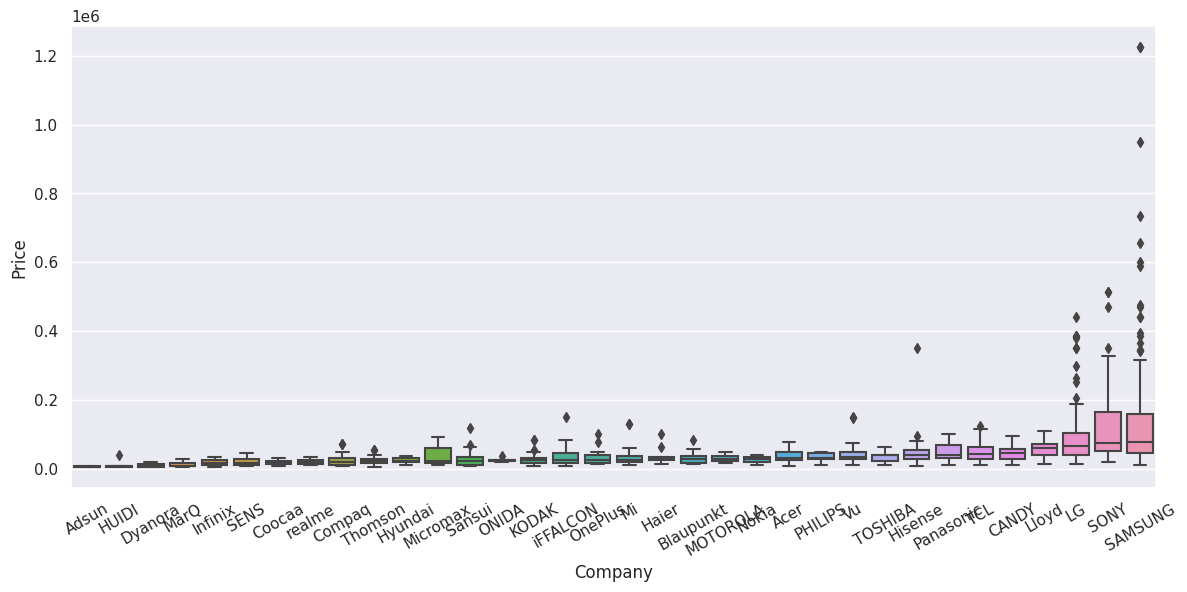

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(14,6)})
sorted_nb = tv_filt.groupby(['Company'])['Price'].median().sort_values()
g=sns.boxplot(x=tv_filt['Company'], y=tv_filt['Price'], order=list(sorted_nb.index))
g.set_xticklabels(g.get_xticklabels(),rotation=30)

<Axes: xlabel='Display', ylabel='Price'>

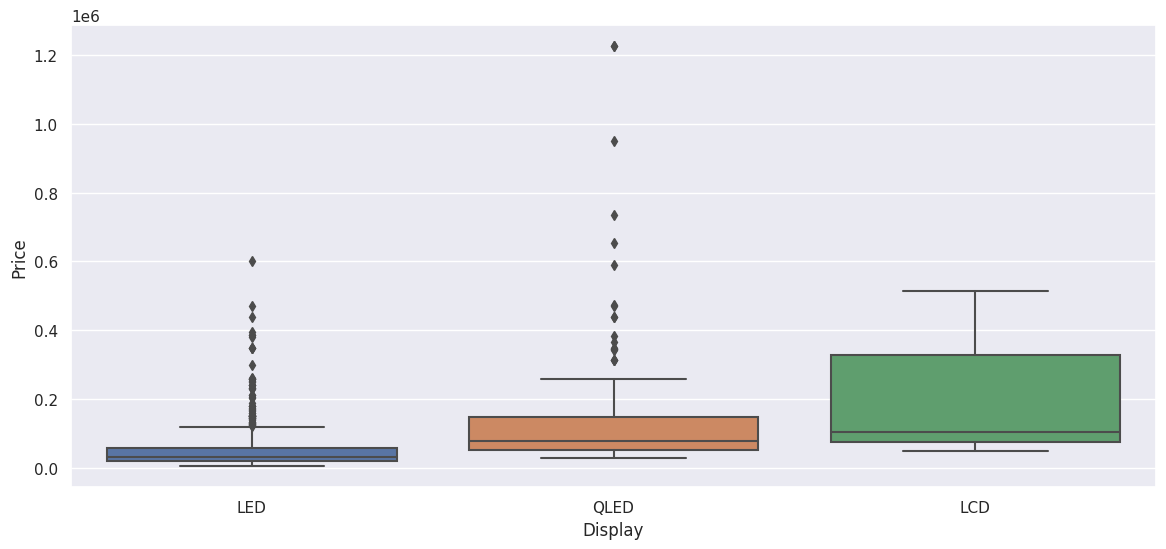

In [ ]:
sorted_nb = tv_filt.groupby(['Display'])['Price'].median().sort_values()
sns.boxplot(x=tv_filt['Display'], y=tv_filt['Price'], order=list(sorted_nb.index))

<Axes: xlabel='Operating System', ylabel='Price'>

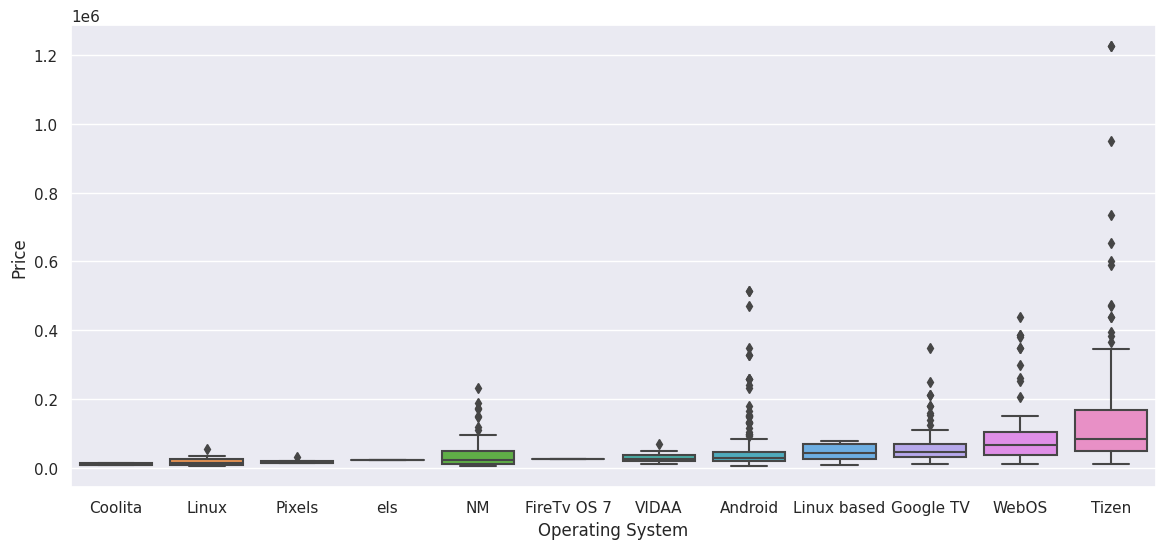

In [ ]:
sorted_nb = tv_filt.groupby(['Operating System'])['Price'].median().sort_values()
sns.boxplot(x=tv_filt['Operating System'], y=tv_filt['Price'], order=list(sorted_nb.index))

<Axes: xlabel='Resolution', ylabel='Price'>

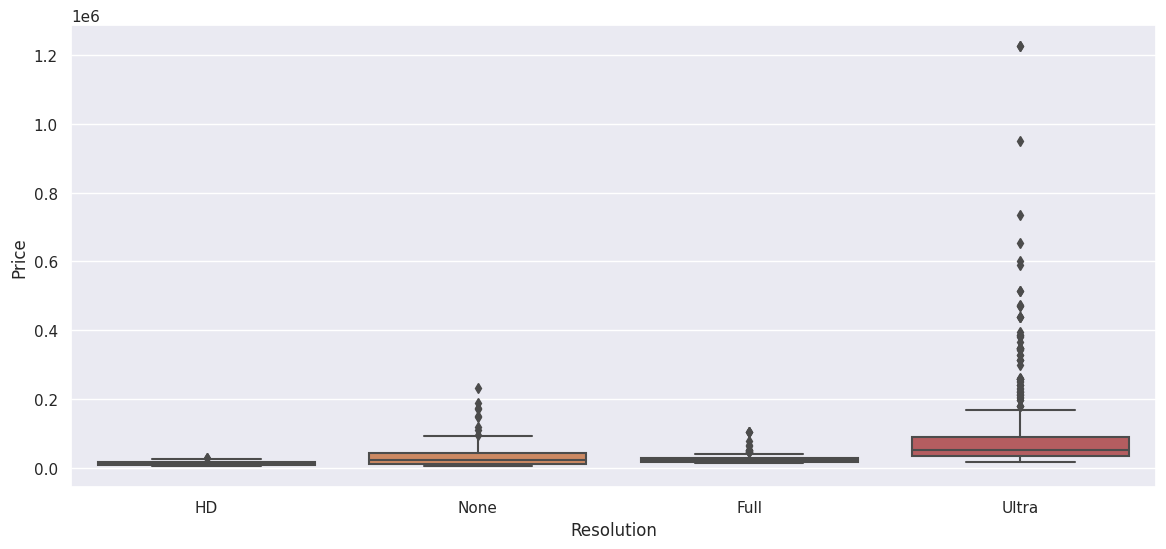

In [ ]:
sorted_nb = tv_filt.groupby(['Resolution'])['Price'].median().sort_values()
sns.boxplot(x=tv_filt['Resolution'], y=tv_filt['Price'], order=list(sorted_nb.index))

<Axes: xlabel='Pixels', ylabel='Price'>

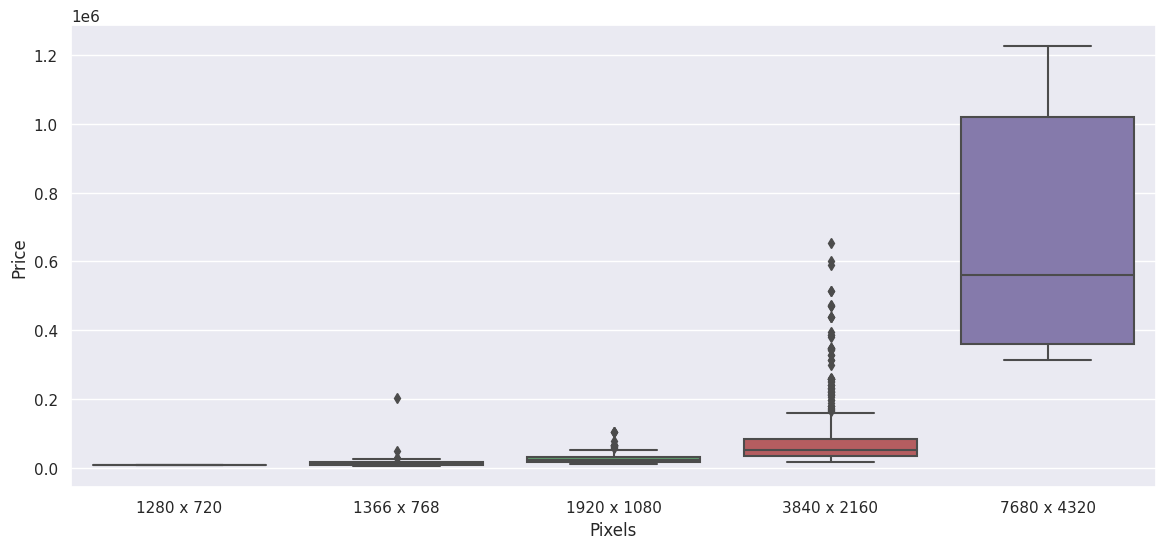

In [ ]:
sorted_nb = tv_filt.groupby(['Pixels'])['Price'].median().sort_values()
sns.boxplot(x=tv_filt['Pixels'], y=tv_filt['Price'], order=list(sorted_nb.index))

<Axes: xlabel='4K', ylabel='Price'>

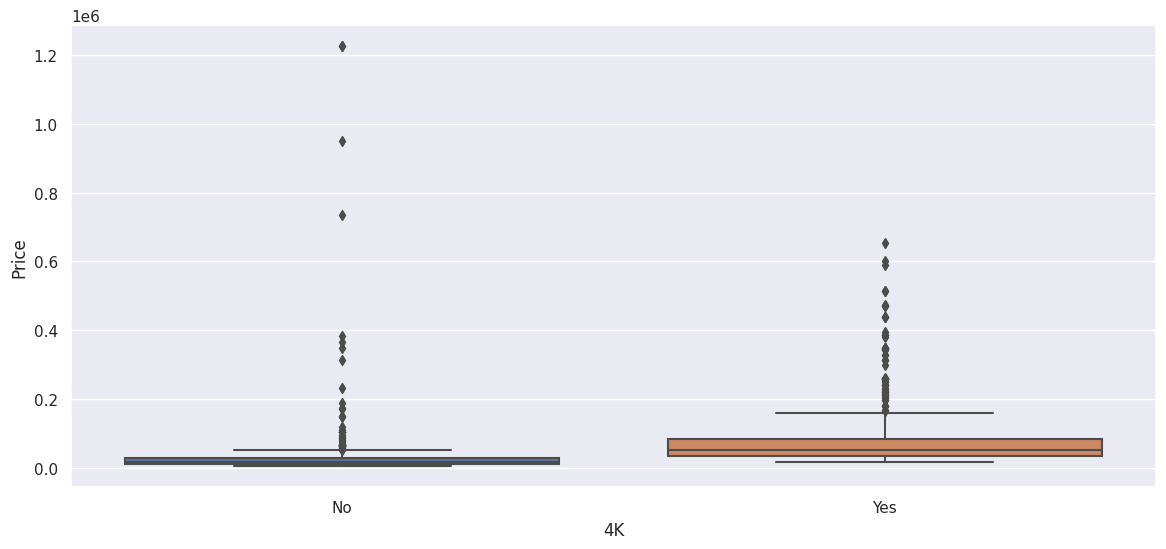

In [ ]:
sorted_nb = tv_filt.groupby(['4K'])['Price'].median().sort_values()
sns.boxplot(x=tv_filt['4K'], y=tv_filt['Price'], order=list(sorted_nb.index))

In [ ]:
%pip install category_encoders
import category_encoders as ce

encoder= ce.OrdinalEncoder(cols=['Pixels'],return_df=True,
                           mapping=[{'col':'Pixels',
'mapping':{'1280 x 720':1,'1366 x 768':2,'1920 x 1080':3,'3840 x 2160':4,'7680 x 4320':5}}])

tv_filt['Pixels_t'] = encoder.fit_transform(tv_filt['Pixels'])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 3.3 MB/s eta 0:00:00


In [ ]:
encoder= ce.OrdinalEncoder(cols=['4K'],return_df=True,
                           mapping=[{'col':'4K',
'mapping':{'No':0,'Yes':1}}])

tv_filt['4K_t'] = encoder.fit_transform(tv_filt['4K'])

In [ ]:
encoder= ce.OrdinalEncoder(cols=['Display'],return_df=True,
                           mapping=[{'col':'Display',
'mapping':{'LED':1,'QLED':2,'LCD':3}}])

tv_filt['Display_t'] = encoder.fit_transform(tv_filt['Display'])

In [ ]:
encoder= ce.OrdinalEncoder(cols=['Resolution'],return_df=True,
                           mapping=[{'col':'Resolution',
'mapping':{'HD':0,'None':1,'Full':2,'Ultra':3}}])

tv_filt['Resolution_t'] = encoder.fit_transform(tv_filt['Resolution'])

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
tv_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 930
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           871 non-null    object 
 1   Display           871 non-null    object 
 2   Size              871 non-null    int64  
 3   Operating System  871 non-null    object 
 4   Product Warranty  871 non-null    int64  
 5   Resolution        871 non-null    object 
 6   Pixels            871 non-null    object 
 7   4K                871 non-null    object 
 8   Price             871 non-null    int64  
 9   Rating            871 non-null    float64
 10  Pixels_t          871 non-null    int64  
 11  4K_t              871 non-null    int64  
 12  Display_t         871 non-null    int64  
 13  Resolution_t      871 non-null    int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 102.1+ KB


In [ ]:
vif = calc_vif(tv_filt[['Display_t','Size','Pixels_t','4K_t','Resolution_t','Product Warranty']])

In [ ]:
vif

,variables,VIF
0,Display_t,10.536806
1,Size,40.280993
2,Pixels_t,67.483212
3,4K_t,10.786092
4,Resolution_t,35.307156
5,Product Warranty,6.558998


In [ ]:
tv_encoded = pd.get_dummies(tv_filt, columns = ['Company','Operating System'])
tv_encoded.head(5)

,Display,Size,Product Warranty,Resolution,Pixels,4K,Price,Rating,Pixels_t,4K_t,...,Operating System_FireTv OS 7,Operating System_Google TV,Operating System_Linux,Operating System_Linux based,Operating System_NM,Operating System_Pixels,Operating System_Tizen,Operating System_VIDAA,Operating System_WebOS,Operating System_els
0,LED,32,1,HD,1366 x 768,No,11999,4.4,2,0,...,0,0,0,0,0,0,1,0,0,0
1,LED,32,1,HD,1366 x 768,No,11999,4.4,2,0,...,0,0,0,0,0,0,0,0,0,0
2,LED,32,1,HD,1366 x 768,No,10999,4.3,2,0,...,0,0,0,0,0,0,0,0,0,0
3,LED,32,1,HD,1366 x 768,No,13990,4.4,2,0,...,0,0,0,0,0,0,0,0,1,0
4,LED,32,1,HD,1366 x 768,No,8199,4.2,2,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
pthres = np.percentile(tv_encoded['Price'], 98)
pthres

385021.2

In [ ]:
tv_encoded = tv_encoded[tv_encoded['Price']<=pthres]

In [ ]:
#tv_encoded = tv_encoded.drop(["Display","Pixels","4K","Resolution"],axis=1)

In [ ]:
#tv_encoded = pd.get_dummies(tv_filt, columns = ['Company', 'Display','Operating System','Resolution','Pixels','4K'])
#tv_encoded.head(5)

,Size,Product Warranty,Price,Rating,Company_Acer,Company_Adsun,Company_Blaupunkt,Company_CANDY,Company_Compaq,Company_Coocaa,...,Resolution_HD,Resolution_None,Resolution_Ultra,Pixels_1280 x 720,Pixels_1366 x 768,Pixels_1920 x 1080,Pixels_3840 x 2160,Pixels_7680 x 4320,4K_No,4K_Yes
0,32,1,11999,4.4,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,32,1,11999,4.4,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,32,1,10999,4.3,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,32,1,13990,4.4,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,32,1,8199,4.2,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [ ]:
trainY = tv_encoded["Price"]
trainX = tv_encoded.drop(["Price"],axis=1)

In [ ]:
trainX.head(5)

,Size,Product Warranty,Rating,Pixels_t,4K_t,Display_t,Resolution_t,Company_Acer,Company_Adsun,Company_Blaupunkt,...,Operating System_FireTv OS 7,Operating System_Google TV,Operating System_Linux,Operating System_Linux based,Operating System_NM,Operating System_Pixels,Operating System_Tizen,Operating System_VIDAA,Operating System_WebOS,Operating System_els
0,32,1,4.4,2,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,32,1,4.4,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,32,1,4.3,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,32,1,4.4,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,32,1,4.2,2,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor, VotingRegressor, StackingRegressor,AdaBoostClassifier
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, ElasticNet, SGDRegressor
from sklearn.linear_model import PassiveAggressiveRegressor, ARDRegression
from sklearn.linear_model import TheilSenRegressor, RANSACRegressor, HuberRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(trainX,trainY,test_size=0.1, random_state=0)

In [ ]:
model_table = pd.DataFrame(columns = ['Model Name', 'MAPE'])
def model_accuracy(model,model_name):
    #score = cross_val_score(model,X_train, y_train, cv=5)

     # Train the model
    model.fit(X_train, y_train)

    # Predict on the validation set and calculate MAE
    y_pred = model.predict(X_valid)
    mae = mean_absolute_percentage_error(y_valid, y_pred)

    i=len(model_table)
    model_table.loc[i,'Model Name']=model_name
    model_table.loc[i,'MAPE']=mae

In [ ]:
seed = np.random.seed(0)

models = [
    ('linear', LinearRegression()),
    ('ridgecv', RidgeCV(alphas=np.logspace(-6, 6, 13))),
    ('knn',KNeighborsRegressor()),
    ('rf',RandomForestRegressor()),
    ('lgb',LGBMRegressor(random_state = seed, objective = 'mape')),
    ('dart', LGBMRegressor(random_state = seed, boosting_type = 'dart')),
    ('huber', HuberRegressor(max_iter = 1000000)),
    ('ard',ARDRegression()),
    ('hgb',HistGradientBoostingRegressor(random_state = seed, loss = 'absolute_error')),
    ('gb',GradientBoostingRegressor(random_state = seed, loss = 'absolute_error')),
    ('xgb', XGBRegressor(random_state = seed,objective='reg:absoluteerror')),
    #('theilsen', TheilSenRegressor(random_state = seed)),
    #('ada',AdaBoostClassifier(random_state = seed))
    #('elastic',ElasticNet(random_state = seed, max_iter = 1000000)),
    #('lasso', Lasso(random_state = seed, max_iter = 1000000)),
    #('passive', PassiveAggressiveRegressor(random_state = seed)),
    #('linearsvm', LinearSVR(random_state = seed, max_iter = 1000000)),
    #('mlp', MLPRegressor(random_state = seed, max_iter = 1000000)),
        #('et', ExtraTreesRegressor(random_state = seed, criterion = 'absolute_error')),
    #('rf', RandomForestRegressor(random_state = seed, criterion = 'absolute_error')),
    #('dt',tree.DecisionTreeRegressor()),
]

for (label, model) in models:
    model_accuracy(model, label)

display(model_table.sort_values(by='MAPE').style.background_gradient(cmap='summer_r'))

print("Baseline Validation done!")

,Model Name,MAPE
8,hgb,0.208107
9,gb,0.219777
3,rf,0.220065
4,lgb,0.223784
5,dart,0.233805
2,knn,0.294662
6,huber,0.358647
7,ard,0.555809
1,ridgecv,0.617693
0,linear,0.628227


Baseline Validation done!


In [ ]:
def postprocessor(prediction):
    #thanks to @mattop
    unique_targets = np.unique(tv_encoded["Price"])
    return [min(unique_targets, key = lambda x: abs(x - pred)) for pred in prediction]

In [ ]:
rounded_model_table = pd.DataFrame(columns = ['Model Name', 'Train MAPE', 'Test MAPE'])

def rounded_accuracy(model,model_name):

     # Train the model
    model.fit(X_train, y_train)

    # Predict on the validation set and calculate MAE
    y_hat = postprocessor(model.predict(X_train))
    y_pred = postprocessor(model.predict(X_valid))
    train_mae = mean_absolute_percentage_error(y_train, y_hat)
    test_mae = mean_absolute_percentage_error(y_valid, y_pred)

    i=len(rounded_model_table)
    rounded_model_table.loc[i,'Model Name']=model_name
    rounded_model_table.loc[i,'Train MAPE']=train_mae
    rounded_model_table.loc[i,'Test MAPE']=test_mae

for (label, model) in models:
    rounded_accuracy(model, label)

display(rounded_model_table.sort_values(by='Test MAPE').style.background_gradient(cmap='summer_r'))

print("Rounded Baseline Validation!")

,Model Name,Train MAPE,Test MAPE
8,hgb,0.164236,0.208209
3,rf,0.112570,0.216068
4,lgb,0.173864,0.223883
9,gb,0.175782,0.226822
5,dart,0.200437,0.233425
2,knn,0.249628,0.295330
6,huber,0.289740,0.324934
7,ard,0.463929,0.470384
0,linear,0.460033,0.481073
1,ridgecv,0.457734,0.484401


Rounded Baseline Validation!


In [ ]:
ensemble_models = [
    ('gb',GradientBoostingRegressor(random_state = seed, loss = 'absolute_error')),
    ('hgb', HistGradientBoostingRegressor(random_state = seed, loss = 'absolute_error')),
    ('lgb', LGBMRegressor(random_state = seed, objective = 'mae')),
    ('rf',RandomForestRegressor()),
    ('dart', LGBMRegressor(random_state = seed, boosting_type = 'dart'))
]

model = VotingRegressor(ensemble_models)

rounded_accuracy(model, 'Voting Regressor')

In [ ]:
rounded_model_table

,Model Name,Train MAPE,Test MAPE
0,linear,0.460033,0.481073
1,ridgecv,0.457734,0.484401
2,knn,0.249628,0.29533
3,rf,0.11257,0.216068
4,lgb,0.173864,0.223883
5,dart,0.200437,0.233425
6,huber,0.28974,0.324934
7,ard,0.463929,0.470384
8,hgb,0.164236,0.208209
9,gb,0.175782,0.226822


In [ ]:
#model = GradientBoostingRegressor(random_state = seed, loss = 'absolute_error')
#model.fit(X_train, y_train)
#y_pred = model.predict(X_valid)

In [ ]:
y_pred

array([ 82612.99826822,  87576.52797676, 147492.87177234,  31263.76635856,
       372164.08087079,  44644.77289714,  10075.8010141 ,  18073.29119895,
        67872.46091212,  26071.40436342,  48697.49632873,  81406.39903536,
        88096.73083552,  66133.92065197,  39573.80771329,  62095.6040969 ,
        19484.60064401, 206286.59546042,  80908.4200141 , 372164.08087079,
        81025.90375095,  98023.77830585,  83679.69707832, 150482.05137426,
        69224.90214754,  10395.75319691,  79973.30241146,  33052.28740387,
        93115.47211417,  30328.07988671,  15777.81314269,  22624.46568989,
        87224.58994477,  15317.23405774,  16124.07335198,  12492.33756013,
        25730.47981086,  24161.13163089,  16401.76513845, 103262.5147271 ,
        61695.39550177,  65406.19486   ,  38088.28944838,  64327.6505135 ,
        64489.82005373,  24161.13163089,  23035.52954029,   8299.50274785,
        16124.07335198,  51839.25536411,  22624.46568989, 470648.97328581,
        11780.58386561,  

In [ ]:
y_valid

384    152990
824    249900
679    212990
303     28499
395    734990
        ...  
795     43999
723     15499
255     30990
245     32990
252     22999
Name: Price, Length: 88, dtype: int64

In [ ]:
from sklearn.metrics import r2_score

R_square = r2_score(y_pred, y_valid)
print('Coefficient of Determination', R_square)

Coefficient of Determination -1.0350477910575724
